# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', version=1, return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

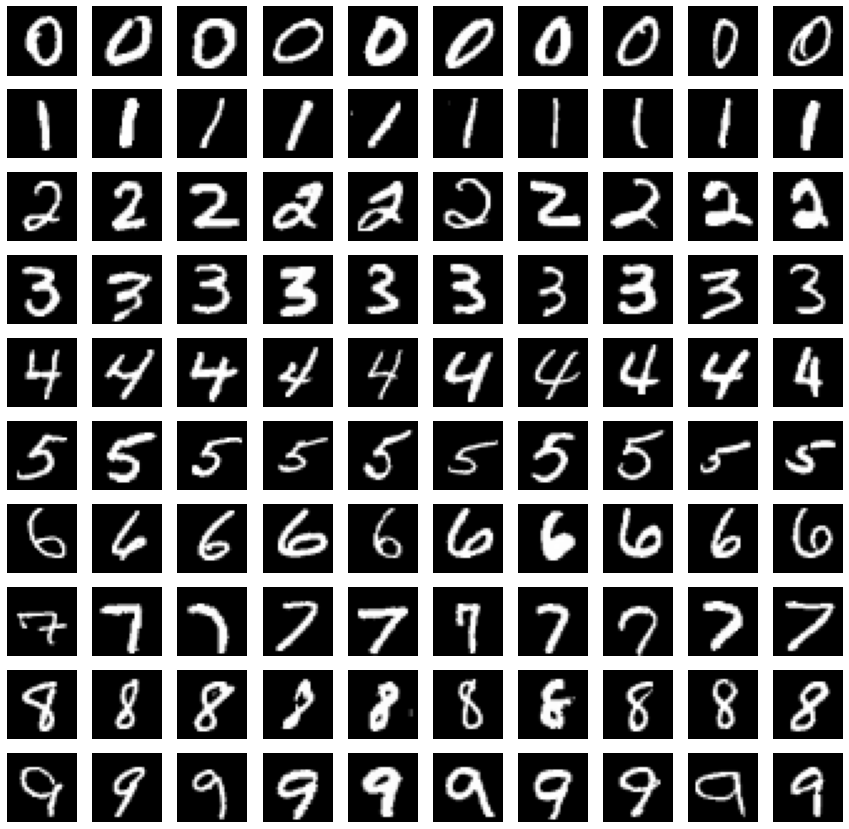

In [ ]:
def P1(num_examples=10):

### STUDENT START ###

# Initialize a plot 10 by the number of examples
  plt.rc('image', cmap='gray')
  fig, ax = plt.subplots(10, num_examples, figsize=(1.5*num_examples, 15))

  digits = list(range(10))
  # Loop through the digits and add to the grid
  for i in digits:
    n = 0
    ind = 0
    while n < num_examples:
      if int(Y[ind]) == i:
        ax[i,n].imshow(X[ind].reshape(28,28))
        ax[i,n].axis('off')
        n += 1
      ind += 1

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [ ]:
def P2(k_values):

### STUDENT START ###
  for k in k_values:
    # Fit on mini train data and test with dev data 
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels = model.predict(dev_data)

    correct = sum(dev_labels == dev_predicted_labels)
    print("k={}: | percentage accuracy = {:.3}%".format(k , correct/len(dev_labels) * 100))

    if k == 1:
      print(classification_report(dev_labels, dev_predicted_labels))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k=1: | percentage accuracy = 88.4%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k=3: | percentage accuracy = 87.6%
k=5: | percentage accuracy = 88.2%
k=7: | percentage accuracy = 87.7%
k=9: | percentage accuracy = 87.5%


ANSWER: With the 1-Nearest Neighbor model looking at the precision scores of the different labels [0-9] the digit 9 is the most difficult to predict.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [ ]:
def P3(train_sizes, accuracies):

### STUDENT START ###
  # Fit on mini train data and test with dev data 
  for t in train_sizes:
    subset_train_data, subset_train_labels = train_data[:t], train_labels[:t]

    # Fit on subsetted train data and test with dev data and start timer
    start = time.time()
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(subset_train_data, subset_train_labels)
    dev_predicted_labels = model.predict(dev_data)

    # Append the caluclated accuracies and print text for accuracy and time taken
    accuracies.append(sum(dev_labels == dev_predicted_labels)/len(dev_labels) * 100)
    stop = time.time()
    print("For training dataset of size {}: accuracy = {:.4}% and time taken = {:.6} secs".format(t, accuracies[-1], (stop-start)))


    

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

For training dataset of size 100: accuracy = 70.2% and time taken = 0.179559 secs
For training dataset of size 200: accuracy = 79.1% and time taken = 0.337207 secs
For training dataset of size 400: accuracy = 81.1% and time taken = 0.66425 secs
For training dataset of size 800: accuracy = 86.6% and time taken = 1.31681 secs
For training dataset of size 1600: accuracy = 90.5% and time taken = 2.69298 secs
For training dataset of size 3200: accuracy = 92.7% and time taken = 5.91366 secs
For training dataset of size 6400: accuracy = 93.9% and time taken = 12.6404 secs
For training dataset of size 12800: accuracy = 95.2% and time taken = 26.2063 secs
For training dataset of size 25600: accuracy = 96.3% and time taken = 55.6933 secs


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

BASE MODEL:
For training set size 60000 the predicted accuracy is 123.62 %
For training set size 120000 the predicted accuracy is 163.74 %
For training set size 1000000 the predicted accuracy is 752.25 %
Base model R^2 value is 0.4177


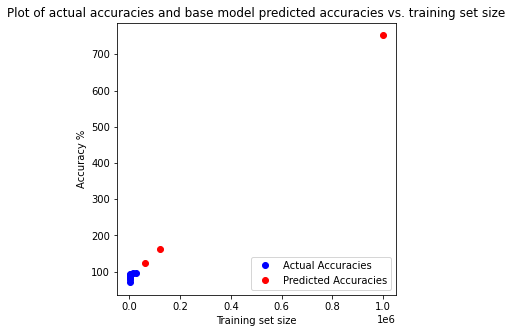


TRANSFORMED VARIABLES MODEL:
For training set size 60000 the predicted accuracy is 96.31 %
For training set size 120000 the predicted accuracy is 96.66 %
For training set size 1000000 the predicted accuracy is 97.41 %
Transformed variable model R^2 value is 0.9395


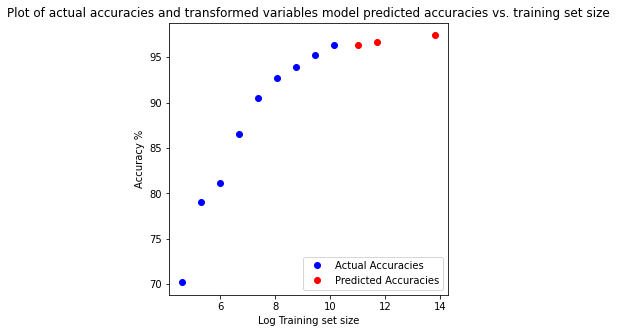

In [ ]:
def P4():

### STUDENT START ###
  # resize input and output to numpy arrays
  np_train_sizes = np.array(train_sizes).reshape(-1, 1)
  np_accuracies = np.array(accuracies)
  predict_train_sizes = np.array([60000, 120000, 1000000]).reshape(-1, 1)

  # Train a base linear model and visualize
  base_lr_model = LinearRegression()
  base_lr_model.fit(np_train_sizes, np_accuracies)

  predicted_base_model_values = base_lr_model.predict(predict_train_sizes)
  print('BASE MODEL:')

  for i, j in zip(predict_train_sizes, predicted_base_model_values):
    print("For training set size %d the predicted accuracy is %.2f %%" % (i,j))

  print("Base model R^2 value is %.4f" % base_lr_model.score(np_train_sizes, np_accuracies))

  plt.figure(figsize=(5,5))
  plt.plot(np_train_sizes, np_accuracies, 'bo', label='Actual Accuracies')
  plt.plot(predict_train_sizes, predicted_base_model_values, 'ro', label='Predicted Accuracies')
  plot_X = np.concatenate((np_train_sizes,predict_train_sizes))
  plt.xlabel('Training set size')
  plt.ylabel('Accuracy %')
  plt.legend(loc='lower right')
  plt.title('Plot of actual accuracies and base model predicted accuracies vs. training set size')
  plt.show()


  # Train another linear model with transformed variables and visualize
  transformed_train_sizes = np.log(np_train_sizes)
  transformed_predict_train_sizes = np.log(predict_train_sizes)
  transformed_accuracies = np_accuracies / (100 - np_accuracies)

  lr_model = LinearRegression()
  lr_model.fit(transformed_train_sizes, transformed_accuracies)

  predicted_model_values = lr_model.predict(transformed_predict_train_sizes)
  inverse_predicted_model_values = 100/ (1 + 1/predicted_model_values)
  print('\nTRANSFORMED VARIABLES MODEL:')

  for i, j in zip(predict_train_sizes, inverse_predicted_model_values):
    print("For training set size %d the predicted accuracy is %.2f %%" % (i,j))

  print("Transformed variable model R^2 value is %.4f" % lr_model.score(transformed_train_sizes, transformed_accuracies))

  plt.figure(figsize=(5,5))
  plt.plot(transformed_train_sizes, np_accuracies, 'bo', label='Actual Accuracies')
  plt.plot(transformed_predict_train_sizes, inverse_predicted_model_values, 'ro', label='Predicted Accuracies')
  plot_X = np.concatenate((transformed_train_sizes,transformed_predict_train_sizes))
  plt.xlabel('Log Training set size')
  plt.ylabel('Accuracy %')
  plt.legend(loc='lower right')
  plt.title('Plot of actual accuracies and transformed variables model predicted accuracies vs. training set size')
  plt.show()



### STUDENT END ###
P4()

ANSWER: The issue with using linear regression on the base model is that as the training set size increase the model tries to linearly increase the predicted accuracy when as seen with the training data, the accuracy does not increase linearly. Also he Accuracy is expected to be bound within 0 and 100 however the linear regression without transformation does not account for this.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

The most confused digit pair is 4 and 9


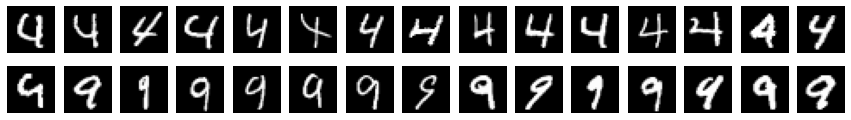

In [ ]:
def P5():

### STUDENT START ###
  # Train 1 NN model
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(mini_train_data, mini_train_labels)
  dev_predicted_labels = model.predict(dev_data)

  # Show the confusion matrix
  matrix = confusion_matrix(dev_labels, dev_predicted_labels)
  print(matrix)

  # To find the most confused pair
  for i in range(10):
      matrix[i, i] = -1
  # to flag if there are multiple pairs with the max value
  if np.count_nonzero(matrix == matrix.max()) == 1:
    max_digits = np.unravel_index(matrix.argmax(), matrix.shape)
    print('\nThe most confused digit pair is %d and %d' % max_digits)
  else:
    print('\nMax confusion value has more than 1 pair of digits')

  # plot images of the most confused pair
  plt.rc('image', cmap='gray')
  fig, ax = plt.subplots(2, 15, figsize=(15,2))

  # Loop through the digits and add to the grid
  for i, row in zip(max_digits, range(2)):
    n = 0
    ind = 0
    while n < 15:
      if int(dev_labels[ind]) == i:
        ax[row,n].imshow(dev_data[ind].reshape(28,28))
        ax[row,n].axis('off')
        n += 1
      ind += 1
      
    
### STUDENT END ###

P5()

ANSWER: The most confused digit pair is 4 and 9

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [ ]:
def P6():
    
### STUDENT START ###
  # helper funtion to blur the image
  def blur(data):
    blur_data = data.copy()
    blur_data = blur_data.reshape(28,28)
    filter = 1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]])
    for i in range(28):
      for j in range(28):
        if i not in [0,27] and j not in [0,27]:
          val = np.sum(blur_data[i-1:i+2, j-1:j+2] * filter)
          blur_data[i,j] = val
    return blur_data.flatten()
  
  # Train 1-NN model with no filter 
  model1 = KNeighborsClassifier(n_neighbors=1)
  model1.fit(mini_train_data, mini_train_labels)
  dev_predicted_labels = model1.predict(dev_data)

  correct = sum(dev_labels == dev_predicted_labels)
  print("No filter on data: percentage accuracy = %.2f%%" % (correct/len(dev_labels) * 100))

  # Train 1-NN model filter the training data but not the dev data
  filtered_mini_train_data = np.array([blur(i) for i in mini_train_data])
  model2 = KNeighborsClassifier(n_neighbors=1)
  model2.fit(filtered_mini_train_data, mini_train_labels)
  dev_predicted_labels = model2.predict(dev_data)

  correct = sum(dev_labels == dev_predicted_labels)
  print("Filtered training data but not dev data: percentage accuracy = %.2f%%" % (correct/len(dev_labels) * 100))

  # Train 1-NN model filter the dev data but not the training data
  filtered_dev_data = np.array([blur(i) for i in dev_data])
  model3 = KNeighborsClassifier(n_neighbors=1)
  model3.fit(mini_train_data, mini_train_labels)
  dev_predicted_labels = model3.predict(filtered_dev_data)

  correct = sum(dev_labels == dev_predicted_labels)
  print("Filtered dev data but not training data: percentage accuracy = %.2f%%" % (correct/len(dev_labels) * 100))

  # Train 1-NN model filter both training data and dev data
  filtered_dev_data = np.array([blur(i) for i in dev_data])
  filtered_mini_train_data = np.array([blur(i) for i in mini_train_data])
  model4 = KNeighborsClassifier(n_neighbors=1)
  model4.fit(filtered_mini_train_data, mini_train_labels)
  dev_predicted_labels = model4.predict(filtered_dev_data)

  correct = sum(dev_labels == dev_predicted_labels)
  print("Filtered dev data and training data: percentage accuracy = %.2f%%" % (correct/len(dev_labels) * 100))

### STUDENT END ###

P6()

No filter on data: percentage accuracy = 88.40%
Filtered training data but not dev data: percentage accuracy = 89.70%
Filtered dev data but not training data: percentage accuracy = 86.80%
Filtered dev data and training data: percentage accuracy = 90.40%


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [ ]:
def P7():

### STUDENT START ###
  # Bernoulli model
  model_1 = BernoulliNB(binarize=0.1)
  model_1.fit(mini_train_data, mini_train_labels)
  print('Bernoulli model accuracy: %.4f' % model_1.score(dev_data, dev_labels))

  # MultinomialNB model
  def categorize(data):
    categorized_data = np.zeros(data.shape)
    # Apply a threshold  to each feature.
    categorized_data[data[:,:] >= 0.1] = 1
    categorized_data[data[:,:] >= 0.9] = 2
    return categorized_data

  categorized_mini_train_data = categorize(mini_train_data)
  categorized_dev_data = categorize(dev_data)
  model_2 = MultinomialNB()
  model_2.fit(categorized_mini_train_data, mini_train_labels)
  print('Multionomial model accuracy: %.4f' % model_2.score(categorized_dev_data, dev_labels))
  
### STUDENT END ###

P7()

Bernoulli model accuracy: 0.8140
Multionomial model accuracy: 0.8070


ANSWER: The multinomial model did not improve the performance of the model. 

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [4]:
def P8(alphas):

### STUDENT START ###
  model = BernoulliNB(binarize=0)
  
  gs_NB = GridSearchCV(model,
                      param_grid=alphas,
                      scoring='accuracy',
                      cv=5)
  gs_NB.fit(mini_train_data, mini_train_labels)
  return gs_NB

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print('Mean Test Scores: ',nb.cv_results_['mean_test_score'])
print("Best alpha = ", nb.best_params_)

Mean Test Scores:  [0.814 0.819 0.825 0.822 0.818 0.813 0.809 0.805 0.783]
Best alpha =  {'alpha': 0.001}


ANSWER: The accuracy of thhe model reduced as alpha neared 0. This is what we would expect

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [5]:
def P9():

### STUDENT END ###
  # first GaussianNB model without any changes
  model = GaussianNB()
  model.fit(mini_train_data, mini_train_labels)
  print('Gaussian model accuracy: %.4f' % model.score(dev_data, dev_labels))

  
  # Adjusted the sigma values to improve model accuracy
  model.sigma_ = model.sigma_ * 0 + model.sigma_.max()
  print('Gaussian model accuracy: %.4f' % model.score(dev_data, dev_labels))

### STUDENT END ###

P9()

Gaussian model accuracy: 0.5930
Gaussian model accuracy: 0.8020


ANSWER: After observing the variance of all the features, I added the maximum variance to the sigma_ of the model. That improved the model accuracy

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

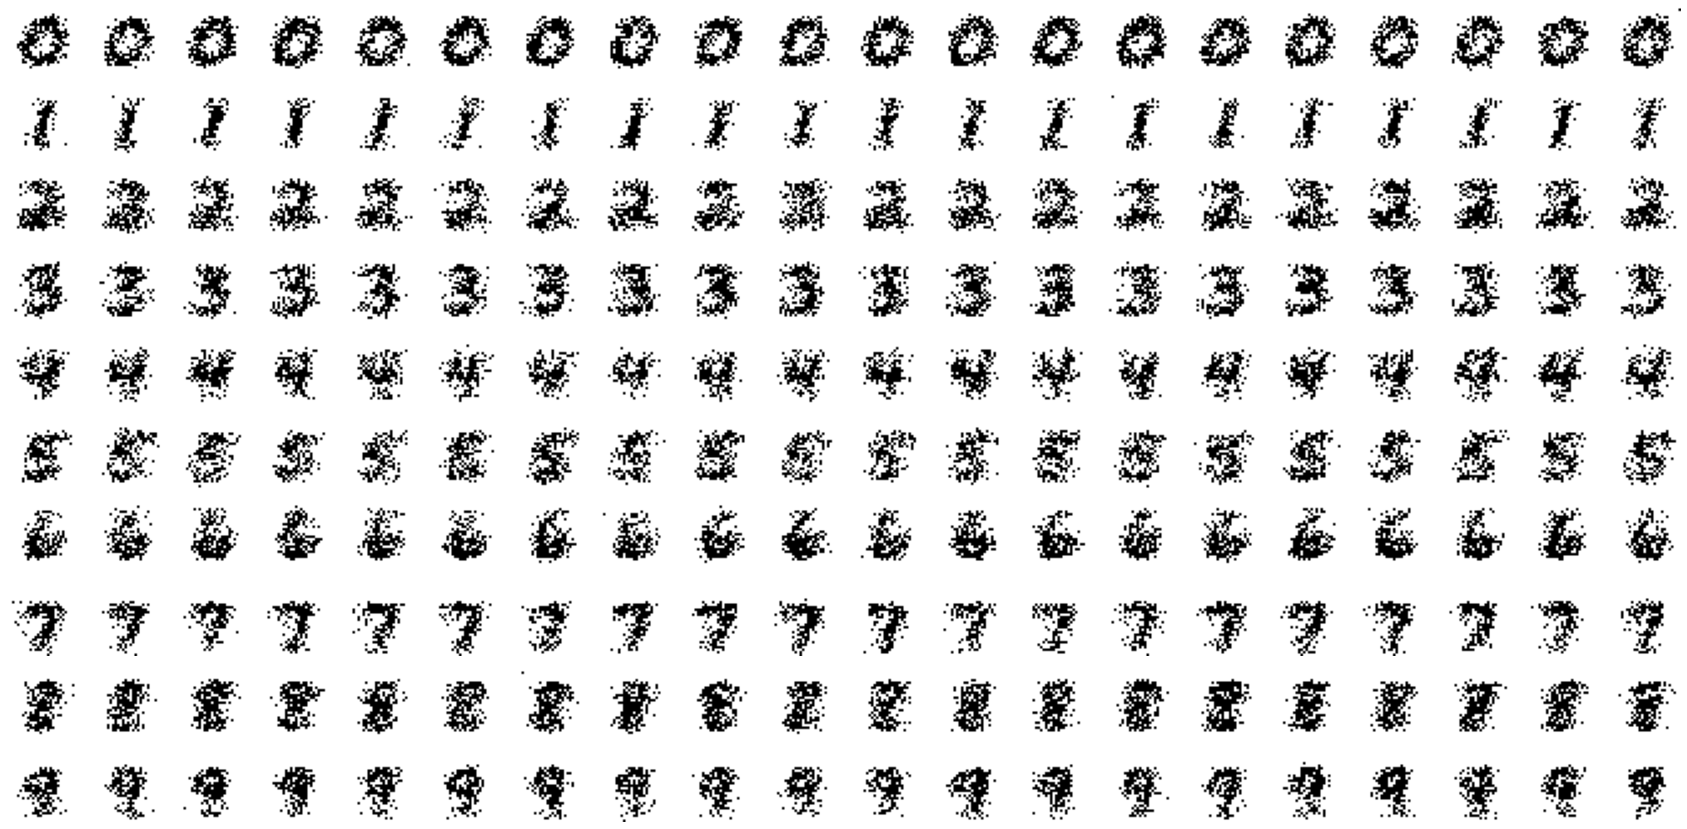

In [23]:
def P10(num_examples=20):

### STUDENT START ###
  # Train a BernoulliNB model.
  model = BernoulliNB()
  model.fit(train_data, train_labels)

  # Initialize a plot 10 by the number of examples
  plt.rc('image', cmap='gray')
  fig, ax = plt.subplots(10, num_examples, figsize=(1.5*num_examples, 15))

  digits = list(range(10))

  # Loop through the digits and add to the grid
  for i in digits:
    n = 0
    nums = np.exp(model.feature_log_prob_[i,:])
    while n < num_examples:
      random = np.random.rand(784,)
      random[random < nums] = 0
      random[random >= nums] = 1
      ax[i,n].imshow(random.reshape(28,28))
      ax[i,n].axis('off')
      n += 1
  



### STUDENT END ###

P10(20)

ANSWER: I trained on the training data to get an impoved model. The generated model produced relatively good digits for the diffent digit classes. I did notice the numbers 9 and 4 are very similar in how they came out of the generated model

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [154]:
def P11(buckets, correct, total):
    
### STUDENT START ###
  # Train a BernoulliNB model.
  model = BernoulliNB(alpha=0.001)
  model.fit(mini_train_data, mini_train_labels)

  # Obtain posterior probabilities.
  post_probs = model.predict_proba(dev_data)
  
  # Each observation to bucket the max probabilities.
  max_probs, max_ind = post_probs.max(axis=1), post_probs.argmax(axis=1)

  # Bucket the the data into the bins
  bins = np.digitize(max_probs, buckets, right=True)

  # Update correct and total
  for i in range(len(buckets)):
    index = bins == i
    total[i] = np.count_nonzero(index)
    correct[i] = np.count_nonzero(max_ind[index] == dev_labels[index].astype(int))
              
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)



for i in range(len(buckets)):
  accuracy = 0.0
  if (total[i] > 0): accuracy = correct[i] / total[i]
  print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


*ANSWER*: Looking at the accuracy based on teh p(pred), this classifier is weakly callibrated because there is a positive correlation with accuracy and the p(pred).

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()